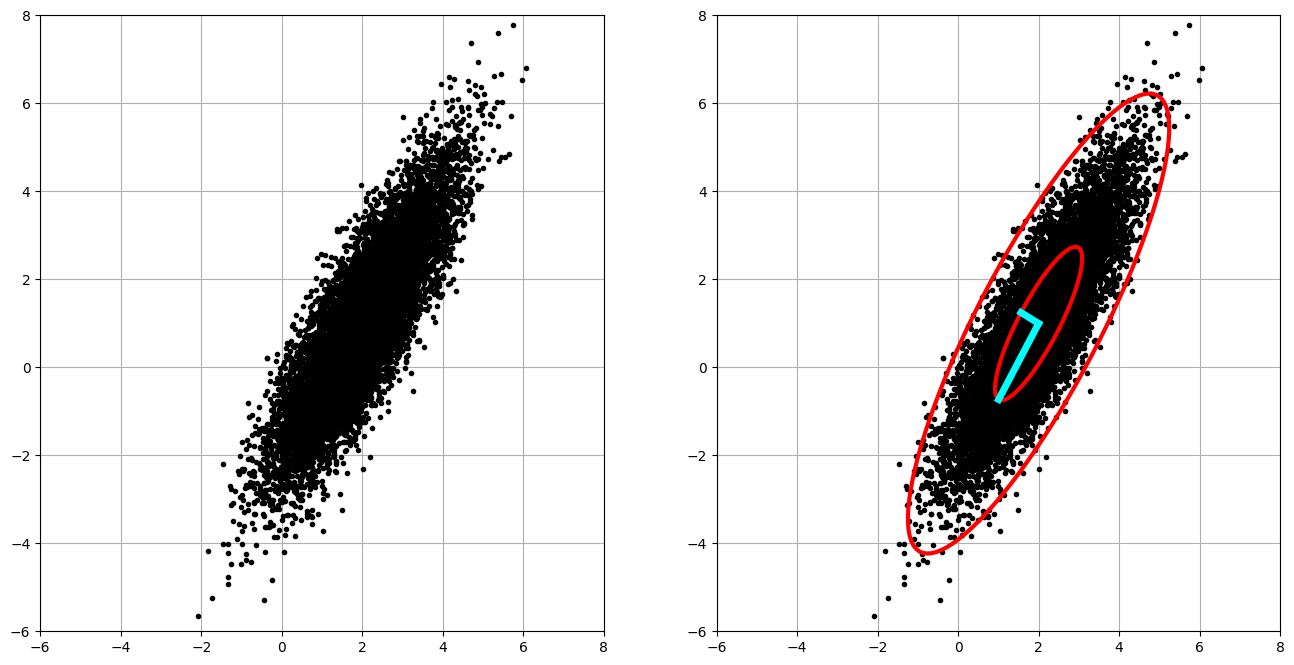

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 8]

"""
Part 1: Create 10^4 points from a 2D Gaussian distribution
"""
xC = np.array([2, 1])      # Center of data (mean)
sig = np.array([2, 0.5])   # Principal axes

theta = np.pi/3            # Rotate cloud by pi/3

R = np.array([[np.cos(theta), -np.sin(theta)],     # Rotation matrix
              [np.sin(theta), np.cos(theta)]])

nPoints = 10000            # Create 10,000 points
X = R @ np.diag(sig) @ np.random.randn(2,nPoints) + np.diag(xC) @ np.ones((2,nPoints)) 
# np.random.randn(2,nPoints): 2x10000 matrix of random numbers from a standard normal distribution (mean = 0, SD = 1)
# np.diag(sig): 2x2 matrix. Sigma generally sketch matrix. And this matrix use sig as diagonal elements
# R @: rotate the 2x2 matrix

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(X[0,:],X[1,:], '.', color='k')
ax1.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

## f_ch01_ex03_1b

Xavg = np.mean(X,axis=1)                  
# Compute mean, mean return a 2x1 matrix (respect to X and Y axis)
# np.mean(axis = 1) means the mean is computed along each row of the X matrix. 
B = X - np.tile(Xavg,(nPoints,1)).T       
# Mean-subtracted data
# np.tile(Xavg,(nPoints,1)).T: create a 10000 rows x 1 column matrix, each column is the mean of X and Y axis

# Find principal components (SVD)
U, S, VT = np.linalg.svd(B/np.sqrt(nPoints),full_matrices=0)
# U is the matrix of principal axes (eigenvectors), S is the diagonal matrix of singular values (eigenvalues)
# U @ np.diag(S) is the sketch matrix that gives a matrix that scales the unit circle along the principal axes.
# B/np.sqrt(nPoints) is the covariance matrix
# full_matrices=0: it means U, S and VT are reduced matrices and contain only the first two columns and rows.

ax2 = fig.add_subplot(122)
ax2.plot(X[0,:],X[1,:], '.', color='k')   # Plot data to overlay PCA
ax2.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

theta = 2 * np.pi * np.arange(0,1,0.01)

# 1-std confidence interval
Xstd = U @ np.diag(S) @ np.array([np.cos(theta),np.sin(theta)])

# the following plot the red circle
ax2.plot(Xavg[0] + Xstd[0,:], Xavg[1] + Xstd[1,:],'-',color='r',linewidth=3)
# Xavg stored the mean values for both X and Y coordinates. Xavg[1] means the mean value of Y axis
# Xstd[0,:] means the first row of Xstd matrix, which is the X coordinates of the red circle
ax2.plot(Xavg[0] + 2*Xstd[0,:], Xavg[1] + 2*Xstd[1,:],'-',color='r',linewidth=3)
ax2.plot(Xavg[0] + 3*Xstd[0,:], Xavg[1] + 3*Xstd[1,:],'-',color='r',linewidth=3)

# Plot principal components U[:,0]S[0] and U[:,1]S[1] <-- this means trucated matrix up to 2 columns / rows.
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,0]*S[0]]),
         np.array([Xavg[1], Xavg[1]+U[1,0]*S[0]]),'-',color='cyan',linewidth=5)
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,1]*S[1]]),
         np.array([Xavg[1], Xavg[1]+U[1,1]*S[1]]),'-',color='cyan',linewidth=5)
# U contains the principcal component vectors as its column.
# U[0,0] refers to the elements direction and magnitude of the first principal component vector, along X axis
# U[1,0] refers to the elements direction and magnitude of the first principal component vector, along Y axis
# U[0,1] refers to the elements direction and magnitude of the second principal component vector, along X axis
plt.show()